# Network Notes

In [61]:
# good 160 unit *3 network
network_model = "func-27-1-17"
iter1 = 24
iter2 = 3550
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



seed sequence for generation starts at frame index:  60  (approx.  0 : 3 ) 
seed sequence length: 200 
generate with frame sequences: 1 
Generated multiple frames in one action: (198, 13) 198 
wrote frames:  1 
saving generated sample output to:  out/func-27-1-17/out-c2cb-output_1_15000 
generating sample data of length:  200 
seed sequence for generation starts at frame index:  60  (approx.  0 : 3 ) 
seed sequence length: 200 
generate with frame sequences: 1 
Generated multiple frames in one action: (198, 13) 198 
wrote frames:  1 

'


In [62]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  15000
num_iterations :  15000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  10
generate_num_outputs :  2
save_model_every_nth :  10
framelen :  13
frame_seq_len :  200
overlap_sequence :  1
seed_seq_len :  200
seed_start_index :  60
seq_step :  198
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-27-1-17/model-15000.h5
frame_len_ms :  20


In [63]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-27-1-17 Notes

2017-12-26 16:23:54

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

Add a parallel set of dense layers in the generator


In [64]:
if model_type != 'functional':
  nd.model_config(network_model)

Columns: ['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss']


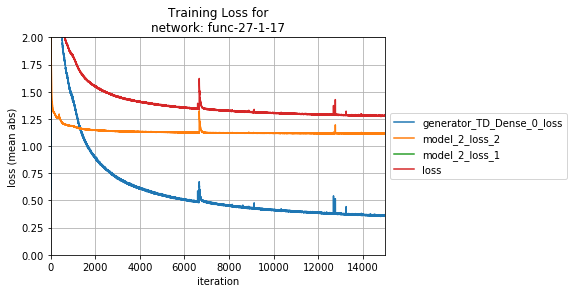

In [65]:
nd.plot_training_loss(network_model, 'mean abs', columns=['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss'], weights=[20,1,1,10], start_index=0, y_max=2) 

In [66]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,generator_TD_Dense_0_loss,loss,model_1_loss,model_2_loss_1,model_2_loss_2

0,0.0179320362475,0.127467238781,0.12739526258,4.54991660135,1.11328404971
0,0.0179788322801,0.127724070294,0.127888704476,4.53420407125,1.11543120077
0,0.0182205066471,0.128075152663,0.127662166125,4.55416504991,1.11676695413
0,0.0178874821061,0.127570604212,0.127467161375,4.56503245074,1.11471868995
0,0.0177131824853,0.127441110983,0.127930519902,4.52802955082,1.11499245447
0,0.017940502274,0.127746562344,0.127385775631,4.56713202476,1.11600109043
0,0.0179246181041,0.127856528038,0.127990984366,4.53329741334,1.11724370481
0,0.0180684416933,0.127893947541,0.128056080397,4.54365408491,1.11632348758
0,0.0180136032965,0.127848940158,0.127342461193,4.56170847484,1.11636695971
0,0.0180203752796,0.127763460412,0.127800385256,4.5478987585,1.11545121508

15000


Latest Iteration: 15000
3200 rate codec



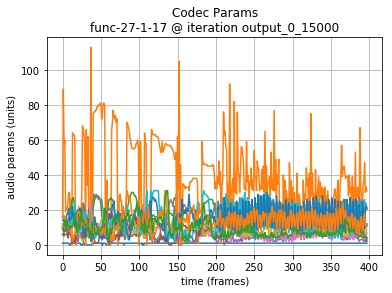

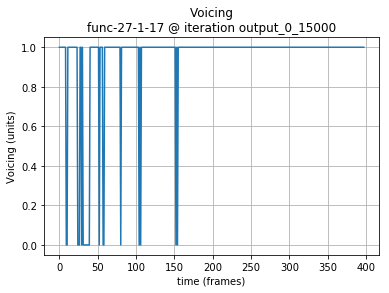

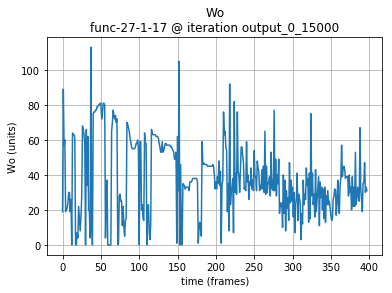

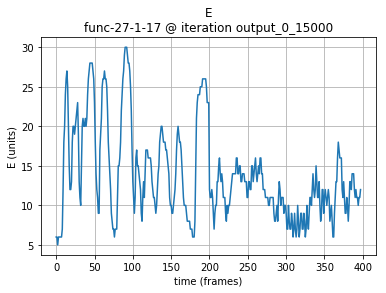

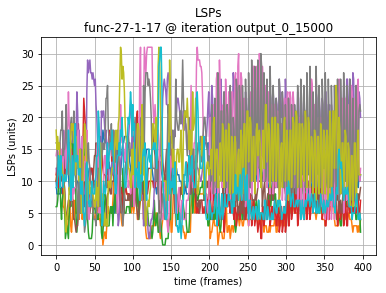

In [67]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

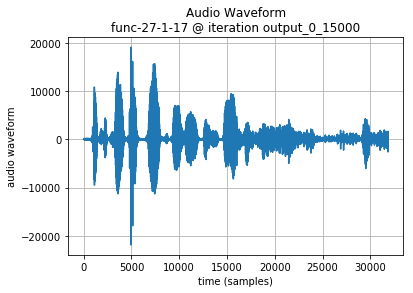

In [68]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

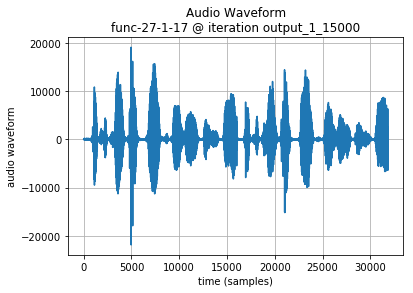

In [69]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

In [70]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

output_0_24


FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-27-1-17/out-c2cb-output_0_24'

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 